In [1]:
#import obj
import pandas as pd
import requests
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
#Data from DeFiLlama
chain_apis = [
    
    ['https://api.llama.fi/charts/Optimism', 'Optimism']
    ,['https://api.llama.fi/charts/Arbitrum', 'Arbitrum']
    ,['https://api.llama.fi/charts/Metis', 'Metis']
    ,['https://api.llama.fi/charts/Boba', 'Boba']
    
]

In [2]:
tvl_data = pd.DataFrame()
for i in chain_apis:
    data = requests.get(i[0]).json()
    temp_data = pd.DataFrame(data)
    temp_data['date'] = pd.to_datetime(temp_data['date'], unit='s')
    temp_data['totalLiquidityUSD'] = temp_data['totalLiquidityUSD']#/1e6
    temp_data['chain'] = str(i[1])
    #print(i[1])
    #print(data)
    tvl_data = tvl_data.append(temp_data)
print(tvl_data.columns)
#     chain_url = i
#     x = chains[0].rfind('/') +1 #get position of chain name in url
#     chain_name = i[x:]
    

# cn = chains[0].rfind('/') +1
# cname = chains[0][cn:]
# print(cn)
# print(cname)

Index(['date', 'totalLiquidityUSD', 'chain'], dtype='object')


In [3]:
tvl_data = tvl_data.pivot(index=['date'],columns='chain',values='totalLiquidityUSD') #if matplotlib

<AxesSubplot:xlabel='date', ylabel='TVL ($B)'>

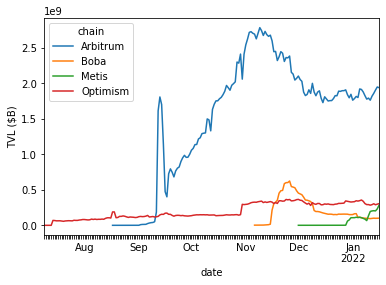

In [5]:
tvl_data.plot(xticks=tvl_data.index, ylabel='TVL ($B)')
#fig = px.line(tvl_data, x="date", y="totalLiquidityUSD", color='chain')
#fig.update_traces(hovertemplate=None)
#https://github.com/d3/d3-format
#fig.update_layout(yaxis_tickprefix = '$', hovermode='x')
#fig.show()

#pio.write_html(fig, file='figure.html', auto_open=True)